In [1]:
%reload_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


In [2]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt
from dbspace.readout import ClinVect, decoder
import dbspace.readout.BR_DataFrame as BR_DataFrame

plt.rcParams["image.cmap"] = "tab10"

sns.set_context("paper")
sns.set(font_scale=4)
sns.set_style("white")

## MAJOR PARAMETERS for our partial biometric analysis
do_pts = [
    "901",
    "903",
    "905",
    "906",
    "907",
    "908",
]  # Which patients do we want to include in this entire analysis?
test_scale = "pHDRS17"  # Which scale are we using as the measurement of the depression state? pHDRS17 = nHDRS (from paper) and is a patient-specific normalized HDRS


Importing from DBSpace.readout...


/dbspace/src/dbspace/readout/ClinVect.py:21: UserWarning: Warning...........Message
  warnings.warn("Warning...........Message")


In [3]:
# Initialize our Clinical Frame and load in our BR Frame

ClinFrame = ClinVect.CStruct("/data/clinical/mayberg_2013/clinical_vectors_all.json")
if test_scale == "mHDRS":
    ClinFrame.gen_mHDRS()
elif test_scale == "DSC":
    ClinFrame.gen_DSC()

frame_to_analyse = 'Chronic_Frame_Dec2022'
BRFrame = pickle.load(open(f"/tmp/{frame_to_analyse}.pickle","rb"))


/dbspace/src/dbspace/readout/ClinVect.py:231: UserWarning: No Stim Changes Metadata file (mat) provided.
  warnings.warn("No Stim Changes Metadata file (mat) provided.")


# Train, test, validate the weekly decoder

In [4]:
main_readout = decoder.weekly_decoderCV(
    BRFrame=BRFrame,
    ClinFrame=ClinFrame,
    pts=do_pts,
    clin_measure=test_scale,
    algo="ENR",
    alpha=-4,
    shuffle_null=False,
    FeatureSet="main",
    variance=False,
)  # main analysis is -3.4
main_readout.global_plotting = True
main_readout.filter_recs(rec_class="main_study")
main_readout.split_train_set(0.6)


Initialized the Weekly CV decoder
Running ENR_CV w/:0.8


Performing Training Setup for Weekly Decoder
Optimal Alpha:  0.03473830048442557
Set ENR-Alpha at 0.03473830048442557
Optimal Alpha:  0.163486252981057
('901', '903', '905')
('901', '903', '906')
('901', '903', '907')
('901', '903', '908')
('901', '905', '906')
('901', '905', '907')
('901', '905', '908')
('901', '906', '907')
('901', '906', '908')
('901', '907', '908')
('903', '905', '906')
('903', '905', '907')
('903', '905', '908')
('903', '906', '907')
('903', '906', '908')
('903', '907', '908')
('905', '906', '907')
('905', '906', '908')
('905', '907', '908')
('906', '907', '908')


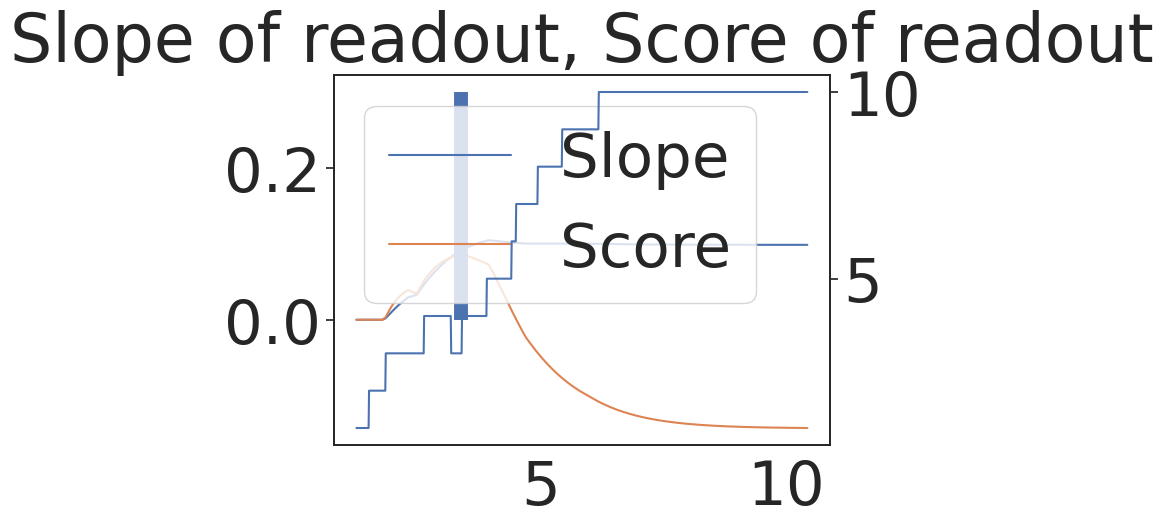

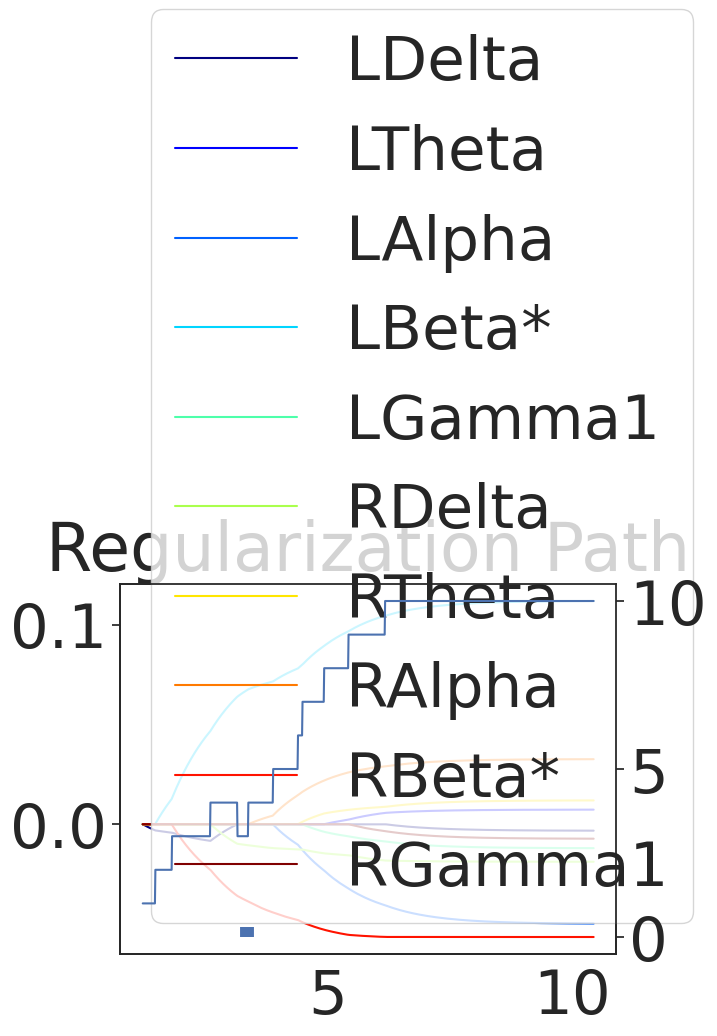

In [5]:
main_readout.train_setup()
optimal_alpha = (
    main_readout._path_slope_regression()
)  # suppress_vars=1/40)#,override_alpha=2**-3) #suppress_vars = 1 works well if we're not doing THarm analysis
main_readout.train_model()


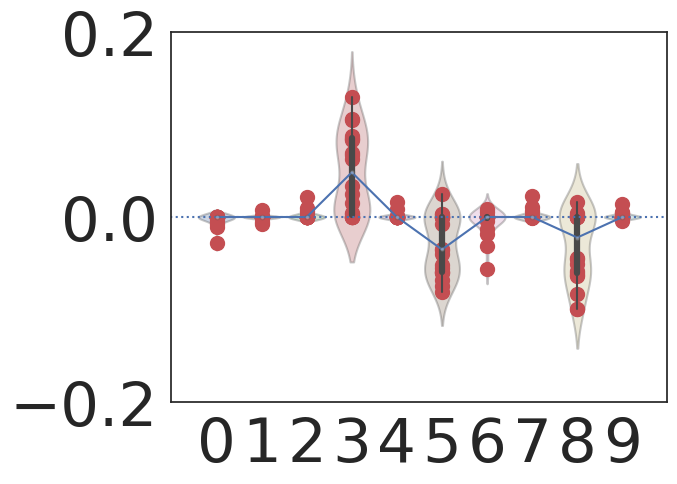

In [6]:
main_readout.plot_decode_CV()


Performing TESTING Setup for Weekly Decoder
901
903
905
906
907
908


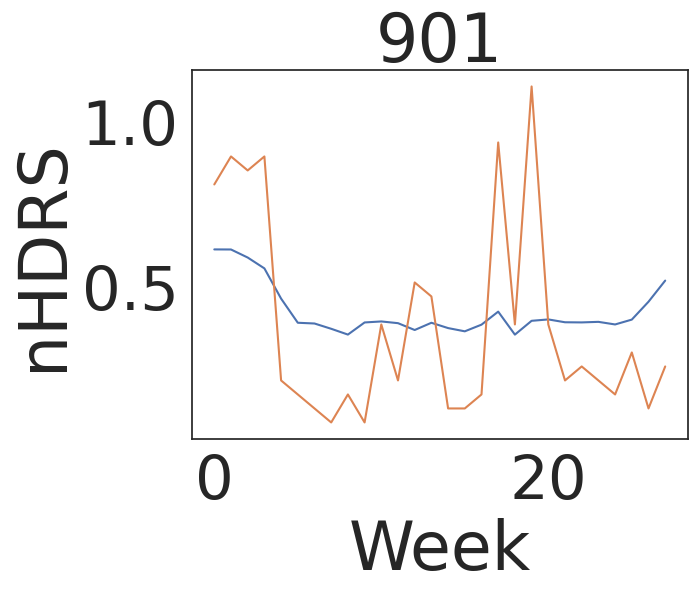

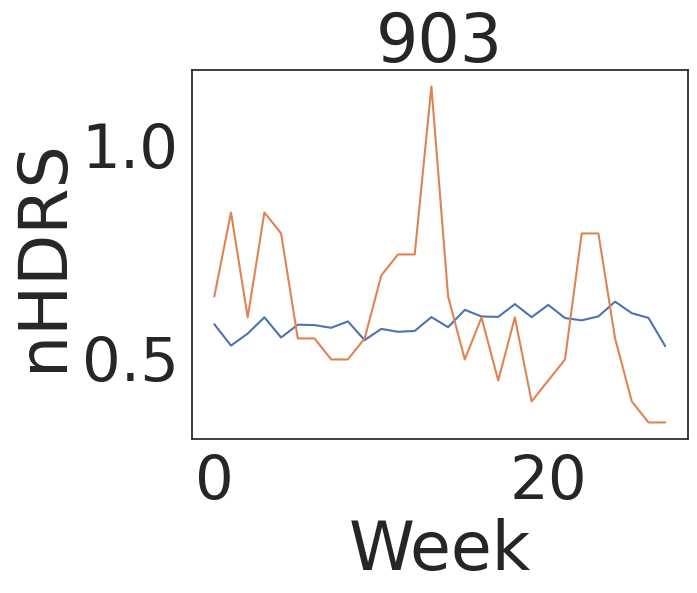

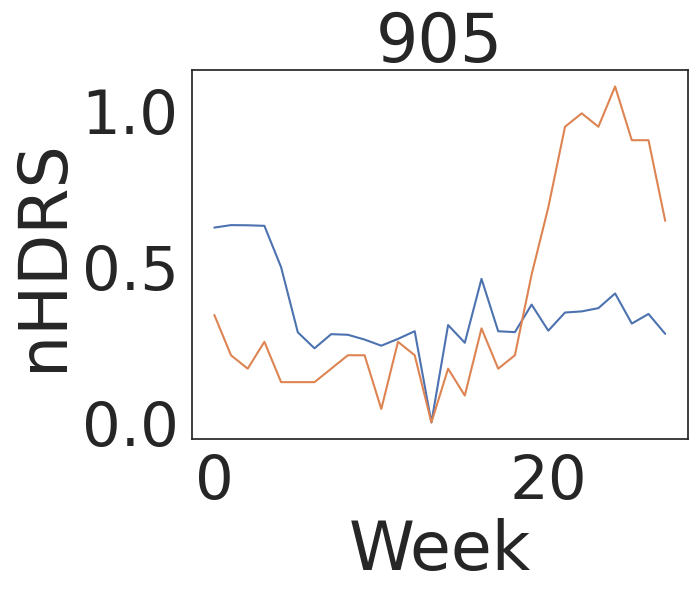

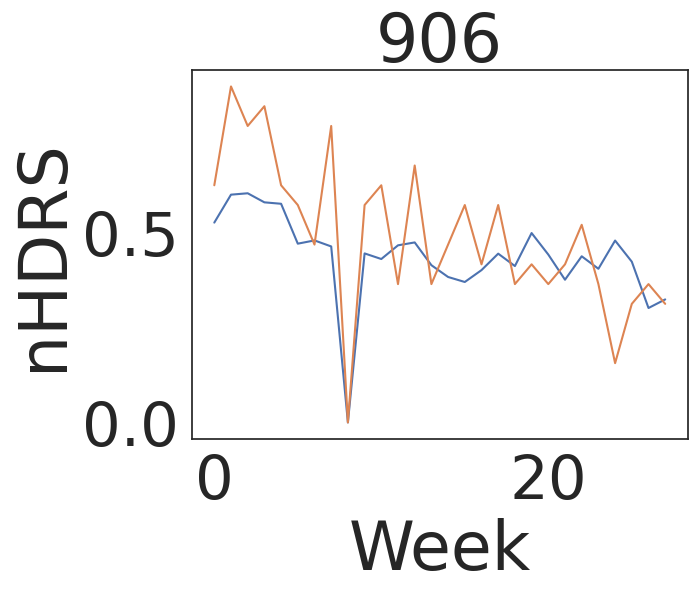

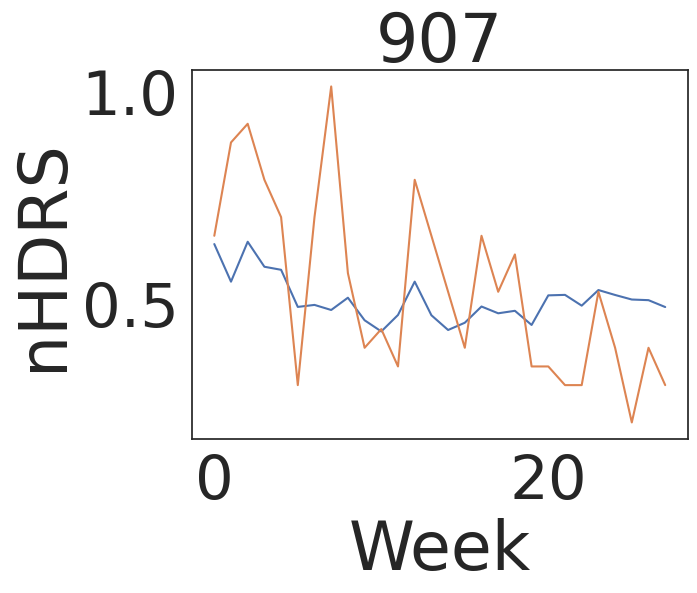

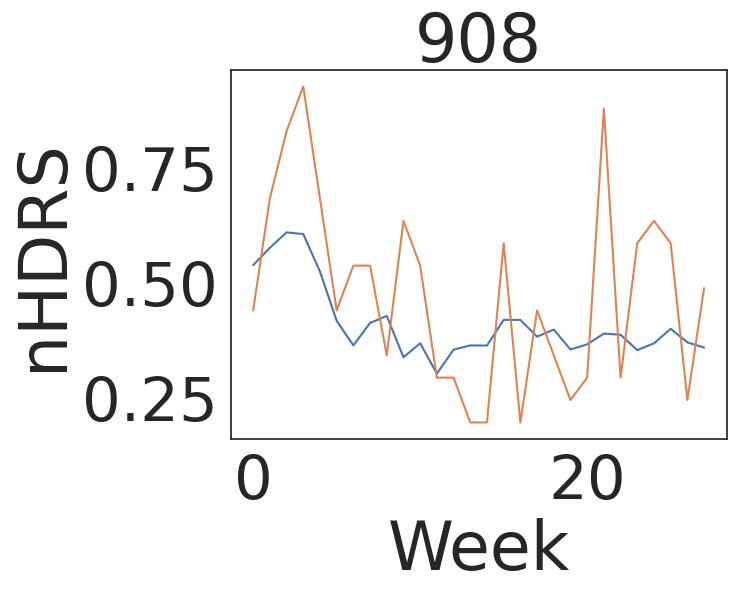

In [7]:
main_readout.test_setup()
main_readout.test_model()

main_readout.plot_test_timecourse()

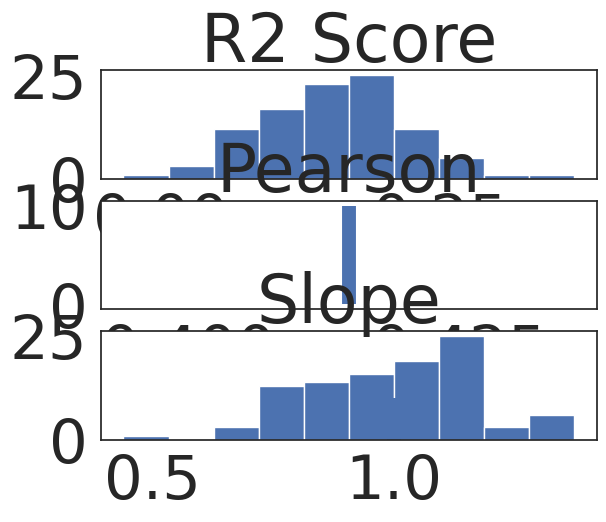

In [8]:
main_readout.plot_test_stats()

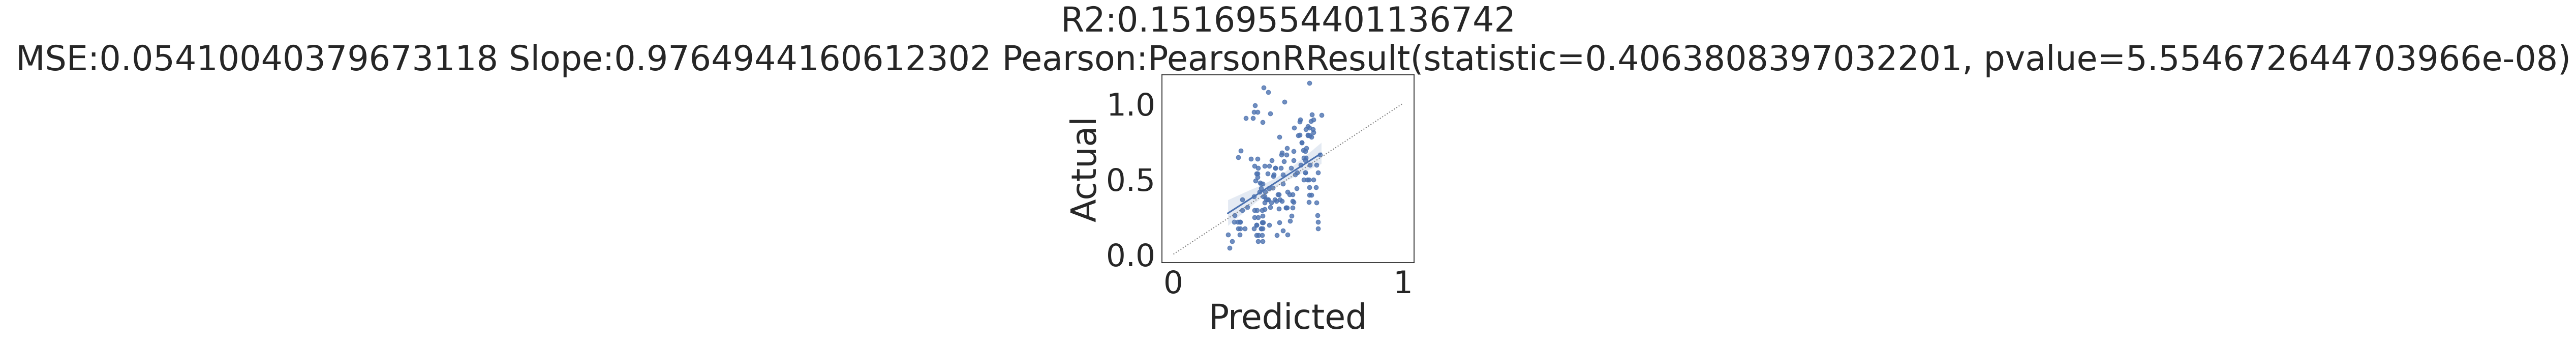

In [9]:
main_readout.plot_test_regression_figure()
# main_readout.plot_combo_paths()


In [10]:
# last successful run
from datetime import date
today = date.today()
print(f"Last Successful Run: {today}")

Last Successful Run: 2024-03-26
